In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import Holt

In [49]:
gdp = pd.read_csv(r"C:\Users\Administrator.DAI-PC2\Downloads\Shubham\Practical Machine Learning\ClassWork\Datasets\gdp-per-capita-ppp-constant-2011.csv")
gdp.columns = ['year','GDPpp']
y = gdp['GDPpp']
y_train = y.iloc[:-4]
y_test = y.iloc[-4:]

In [ ]:
####### Holt linear trend method

C:\Users\Administrator.DAI-PC2\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


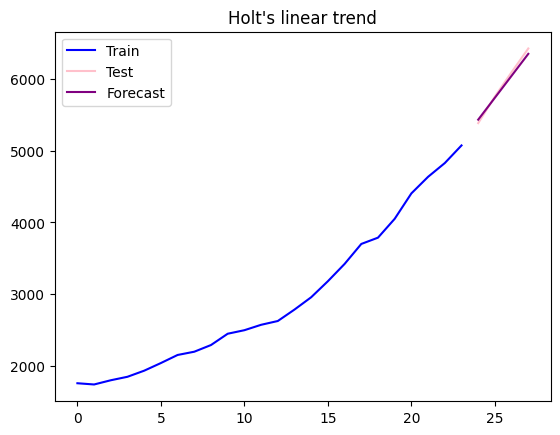

RMSE =  51.78356848679316


In [50]:
alpha = 0.15
beta = 1
holt = Holt(y_train)
fit1= holt.fit(smoothing_level=alpha,smoothing_trend=beta)
fcast1 = fit1.forecast(len(y_test))

y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
plt.title("Holt's linear trend")
plt.legend(loc = 'best')
plt.show()
print("RMSE = ",np.sqrt(mean_squared_error(y_test,fcast1)))

In [ ]:
####### Exponential trend method

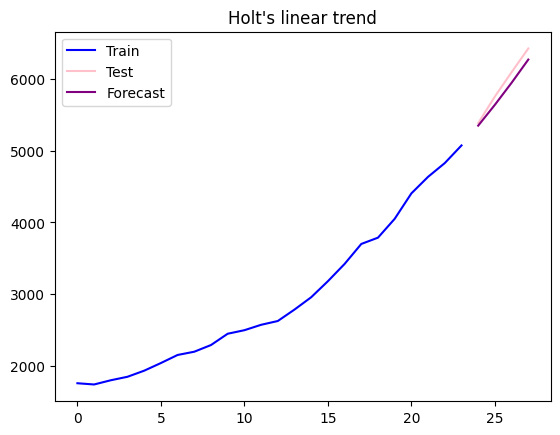

RMSE =  122.86827794561775


In [81]:
alpha = 0.5
beta = 0.2
holt = Holt(y_train, exponential =True)
#fit1= holt.fit(smoothing_level=alpha,smoothing_trend=beta)
fit1= holt.fit() # Auto tune to reduce train error can lead to overfitting
fcast1 = fit1.forecast(len(y_test))

y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
plt.title("Holt's linear trend")
plt.legend(loc = 'best')
plt.show()
print("RMSE = ",np.sqrt(mean_squared_error(y_test,fcast1)))

In [82]:
fit1.params

{'smoothing_level': 0.999999985074408,
 'smoothing_trend': 0.3264159943584466,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1754.857,
 'initial_trend': 0.9901746979953353,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}